In [1]:
#IMPORT PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#READ CSV FILE
df = pd.read_csv("datasets/Suicides in India 2001-2012.csv")
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


<h3>Analyzing Available Data</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [4]:
#INFO shows there are no null values and data is clean.
#To Verify
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [5]:
#Total suicides in India until 2012
df['Total'].sum()

13071734

In [6]:
#Total suicides in India until 2012 statewise
State = df.groupby('State').Total.sum().sort_values(ascending=False)
State
#Total (All India) ----> Includes Union Territories of India
#Total (States) ----> Excluding Union Territories of India

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

In [7]:
#Total suicides in India until 2012 year wise
Year = df.groupby('Year').Total.sum()
Year

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

<h3>Data Visualization</h3>

In [8]:
x = Year.index.values
y = Year.values

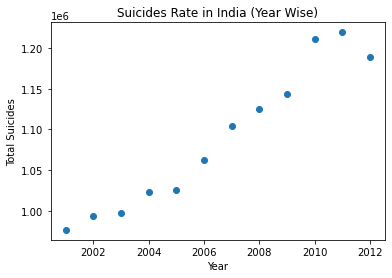

In [9]:
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.title("Suicides Rate in India (Year Wise)")
plt.show()

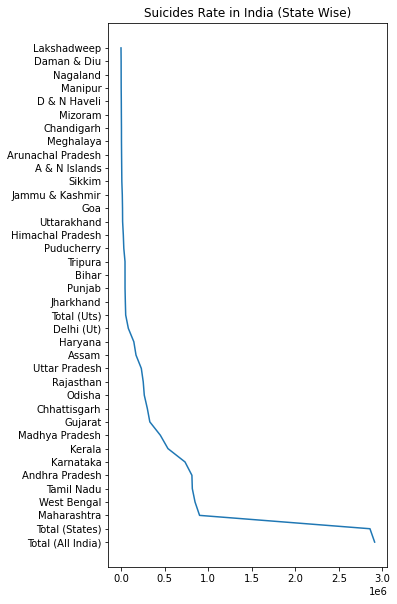

In [10]:
plt.figure(figsize=(5,10))
plt.plot(State.values,State.index.values)
plt.title("Suicides Rate in India (State Wise)")
plt.show()

In [11]:
#Total suicides in India until 2012 year wise
Gender = df.groupby('Gender').Total.sum()
Gender

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

In [12]:
#Total Suicides in India State-Year-Wise
df.groupby(['State','Year'])[['Total']].sum()

Total
State         Year       
A & N Islands 2001    645
              2002    720
              2003    565
              2004    610
              2005    695
...                   ...
West Bengal   2008  74260
              2009  73240
              2010  80185
              2011  82460
              2012  44871

[456 rows x 1 columns]

In [13]:
#Total Suicides in India Gender-Year-Wise
df.groupby(['Gender','Year'])[['Total']].sum()

Total
Gender Year        
Female 2001  379645
       2002  369675
       2003  365657
       2004  369297
       2005  368980
       2006  381677
       2007  390032
       2008  400202
       2009  411050
       2010  426705
       2011  429688
       2012  410366
Male   2001  596819
       2002  623973
       2003  631965
       2004  653840
       2005  656221
       2006  681314
       2007  713635
       2008  724880
       2009  732983
       2010  784617
       2011  789811
       2012  778702

In [14]:
#Total Suicides in India State-Gender-Year-Wise
df.groupby(['State','Gender','Year'])[['Total']].sum()

Total
State         Gender Year       
A & N Islands Female 2001    250
                     2002    265
                     2003    215
                     2004    205
                     2005    265
...                          ...
West Bengal   Male   2008  41845
                     2009  42470
                     2010  46505
                     2011  48120
                     2012  26040

[912 rows x 1 columns]

In [15]:
#Total Suicides in India State-Gender-Year-Wise
df.groupby(['State','Gender','Year'])[['Total']].sum().to_html('index.html')

In [16]:
#Total Suicides in India accordin to the reason for suicide
df.groupby(['Type'])['Total'].sum().sort_values(ascending=False)

Type
Married                                           3065322
Primary                                           1088481
Middle                                            1028913
No Education                                       965271
Never Married                                      954903
                                                   ...   
Bankruptcy or Sudden change in Economic Status       2655
Illegitimate Pregnancy                               2494
Ideological Causes/Hero Worshipping                  2118
By Machine                                           1661
Not having Children (Barrenness/Impotency             766
Name: Total, Length: 69, dtype: int64

<h3>Predicting Future Suicides</h3>

In [17]:
x = Year.index.values.reshape(-1,1)
y = Year.values

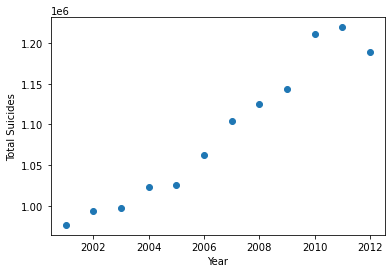

In [18]:
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [20]:
#Slope
reg.coef_

array([23818.18881119])

In [21]:
#Intercept
reg.intercept_

-46701884.682983674

In [22]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

In [23]:
y_pred = reg.predict(x)
y_pred

array([ 958311.12820512,  982129.31701631, 1005947.5058275 ,
       1029765.69463869, 1053583.88344987, 1077402.07226107,
       1101220.26107226, 1125038.44988345, 1148856.63869463,
       1172674.82750582, 1196493.01631701, 1220311.2051282 ])

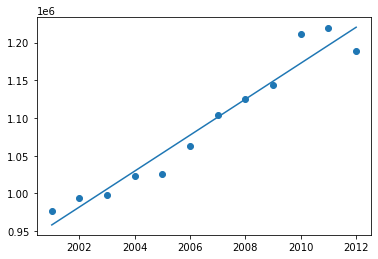

In [24]:
#To get Best Fit Line
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.show()

In [25]:
reg.score(x,y)*100

94.61522633937145

In [26]:
reg.predict([[2020]])

array([1410856.71561771])

<h3>Polynomial Regression</h3>

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(x)
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,2001.0,4004001.0,8.012006e+09,1.603202e+13,3.208008e+16
1,1.0,2002.0,4008004.0,8.024024e+09,1.606410e+13,3.216032e+16
2,1.0,2003.0,4012009.0,8.036054e+09,1.609622e+13,3.224072e+16
3,1.0,2004.0,4016016.0,8.048096e+09,1.612838e+13,3.232128e+16
4,1.0,2005.0,4020025.0,8.060150e+09,1.616060e+13,3.240201e+16
5,1.0,2006.0,4024036.0,8.072216e+09,1.619287e+13,3.248289e+16
6,1.0,2007.0,4028049.0,8.084294e+09,1.622518e+13,3.256393e+16
7,1.0,2008.0,4032064.0,8.096385e+09,1.625754e+13,3.264514e+16
8,1.0,2009.0,4036081.0,8.108487e+09,1.628995e+13,3.272651e+16
9,1.0,2010.0,4040100.0,8.120601e+09,1.632241e+13,3.280804e+16


In [28]:
reg.fit(X,y)

LinearRegression()

In [29]:
reg.coef_

array([ 0.00000000e+00, -1.35670354e-01, -4.33987162e-01, -4.35396980e+02,
        3.25443039e-01, -6.48679853e-05])

In [30]:
reg.intercept_

351865484699.4616

In [31]:
yp=reg.predict(X)
yp

array([ 987173.25848389,  983550.11981201,  992415.54119873,
       1011190.67352295, 1037288.88299561, 1068115.74725342,
       1101069.04852295, 1133538.76287842, 1162907.05682373,
       1186548.27313232, 1201828.93133545, 1206107.71356201])

In [32]:
y

array([ 976464,  993648,  997622, 1023137, 1025201, 1062991, 1103667,
       1125082, 1144033, 1211322, 1219499, 1189068], dtype=int64)

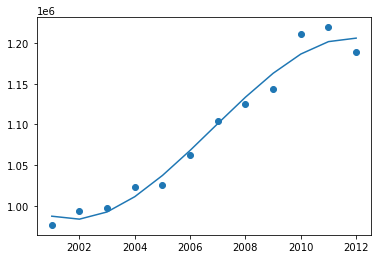

In [33]:
plt.scatter(x,y)
plt.plot(x,yp)
plt.show()

In [34]:
reg.score(X,y)*100

97.42287328633738

In [38]:
year = int(input("Enter the year: "))

Enter the year: 2020


In [39]:
val=poly.transform([[year]])

In [40]:
reg.predict(val)

array([524720.30780029])